# Building the Digraph
By parsing csv files, we create the directed graph representing who follows who in the NBA. A directed edge goes **from A to B, if A follows B**.


In [1]:
# dependencies and constants
import os, csv, operator
import numpy as np
from sklearn.preprocessing import normalize
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
FILE_EXT_NUM = -14
FILE_EXT     = "_processed.csv"
DIR          = "../processed"

In [2]:
# create digraph
G = nx.DiGraph()

In [3]:
# add a node for each player
os.chdir(DIR)
for file in os.listdir():
    if file[-14:] == FILE_EXT: # ignore hidden files
        G.add_node(file[:FILE_EXT_NUM])

In [4]:
# add directed edges between players
for node in G.adj:
    with open(str(node + FILE_EXT), 'r') as file:
        for line in file.readlines():
            line = line.strip()
            for player in G.adj:
                if player == line and player != node:
                    G.add_edge(node, line)

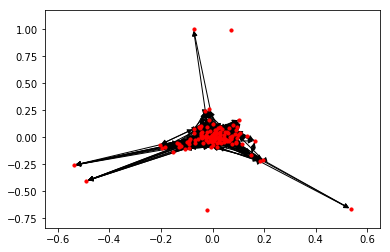

In [5]:
# print graph
nx.draw_networkx(G, with_labels=False, node_size=10)
plt.draw()
plt.show()

# Computing Importance with PageRank
In this section, we compute the importance score of each player in the network. We do this through two methods: first, a manual computation using the ```numpy``` library; then, a one-line computation with ```networkx``` built-in methods as a correctness check. 

In [6]:
# compute H matrix (normalized with no all-zero rows)
A = nx.adjacency_matrix(G).todense()
dim = A.shape[0]
row_sums = A.sum(axis=1)
H = normalize(A, axis=1, norm='l1')
for i in range(0, dim):
    if int(row_sums[i]) is 0:
        for col in H[i]:
            col = 1.0/dim
            
# perform iterations to get the importance vector
theta = 0.85
G = theta * H + (1 - theta) * (1.0 / dim) * np.ones((dim, dim))
print(G.shape)
pi = np.ones(dim)
print(pi.shape)
for i in range(0, dim):
    if i is not 0:
        pi[i] = 0

for i in range(0, 1000):
    pi = pi.dot(G)
    
print(pi)

(114, 114)
(114,)
[8.71935532e-09 4.83601821e-09 9.20833661e-09 1.79693787e-08
 7.27854837e-09 4.61666250e-09 1.50394816e-08 4.43736741e-09
 6.92046641e-09 8.32596310e-09 4.76533695e-09 4.71179872e-09
 6.16471264e-09 2.58558679e-08 1.43315162e-09 8.95069114e-09
 4.44857583e-09 1.56481739e-08 1.26695016e-08 1.83423737e-08
 1.13930685e-08 4.52164156e-09 7.15872790e-09 1.17318118e-08
 3.92156277e-09 1.38612876e-08 3.81172186e-09 1.49133554e-08
 3.75437546e-09 9.39728071e-09 1.69300163e-08 2.83592344e-08
 2.99903637e-08 7.51794413e-09 8.45021343e-09 2.11978116e-08
 8.58649906e-09 1.85974879e-08 2.21360434e-08 8.05900378e-09
 3.44030196e-09 2.25412920e-08 1.02145229e-08 5.13456867e-09
 1.23557991e-08 4.75154221e-09 5.02093241e-09 1.36509136e-08
 1.21366276e-08 7.37651138e-09 3.53424258e-09 7.33281024e-09
 1.35420530e-08 6.54945649e-09 8.07597096e-09 3.85672350e-08
 6.69826466e-09 1.74334466e-08 3.43830622e-09 6.52662816e-09
 1.43315162e-09 8.55871178e-09 2.08589284e-09 4.82165304e-09
 5.860

In [6]:
pr = nx.pagerank(G, alpha = 0.85)
pr_sorted = sorted(pr.items(), key=operator.itemgetter(1), reverse=True)
for item in pr_sorted:
    print(item)

('kingjames', 0.03309155847335478)
('ygtrece', 0.025543302641849133)
('stephencurry30', 0.02472545111996436)
('cp3', 0.02367490990607905)
('jharden13', 0.022458167279892017)
('carmeloanthony', 0.022110164852696016)
('isaiahthomas', 0.019200851851392902)
('antdavis23', 0.018887984496913268)
('joelembiid', 0.018018083165225362)
('jaytatum0', 0.01759698908778494)
('deandre', 0.017212800743103097)
('kuz', 0.01700907798273216)
('damianlillard', 0.0164819852820764)
('demar_derozan', 0.01512114398314907)
('dloading', 0.014977400774086387)
('lukadoncic', 0.014824698657984005)
('sir_deuce2', 0.014795748792482235)
('jimmybutler', 0.013616385148744303)
('zo', 0.013570203312972734)
('blakegriffin23', 0.013469277227529162)
('klaythompson', 0.013407667384919145)
('1ngram4', 0.013067239098376435)
('swipathefox', 0.012636901330483168)
('dbook', 0.012622792122997755)
('karltowns', 0.01229568057800276)
('traeyoung', 0.011489766100320703)
('bensimmons', 0.01148823717850628)
('kyle_lowry7', 0.011031808308